In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\roshi\AppData\Local\Temp\ipykernel_10824\2259232837.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


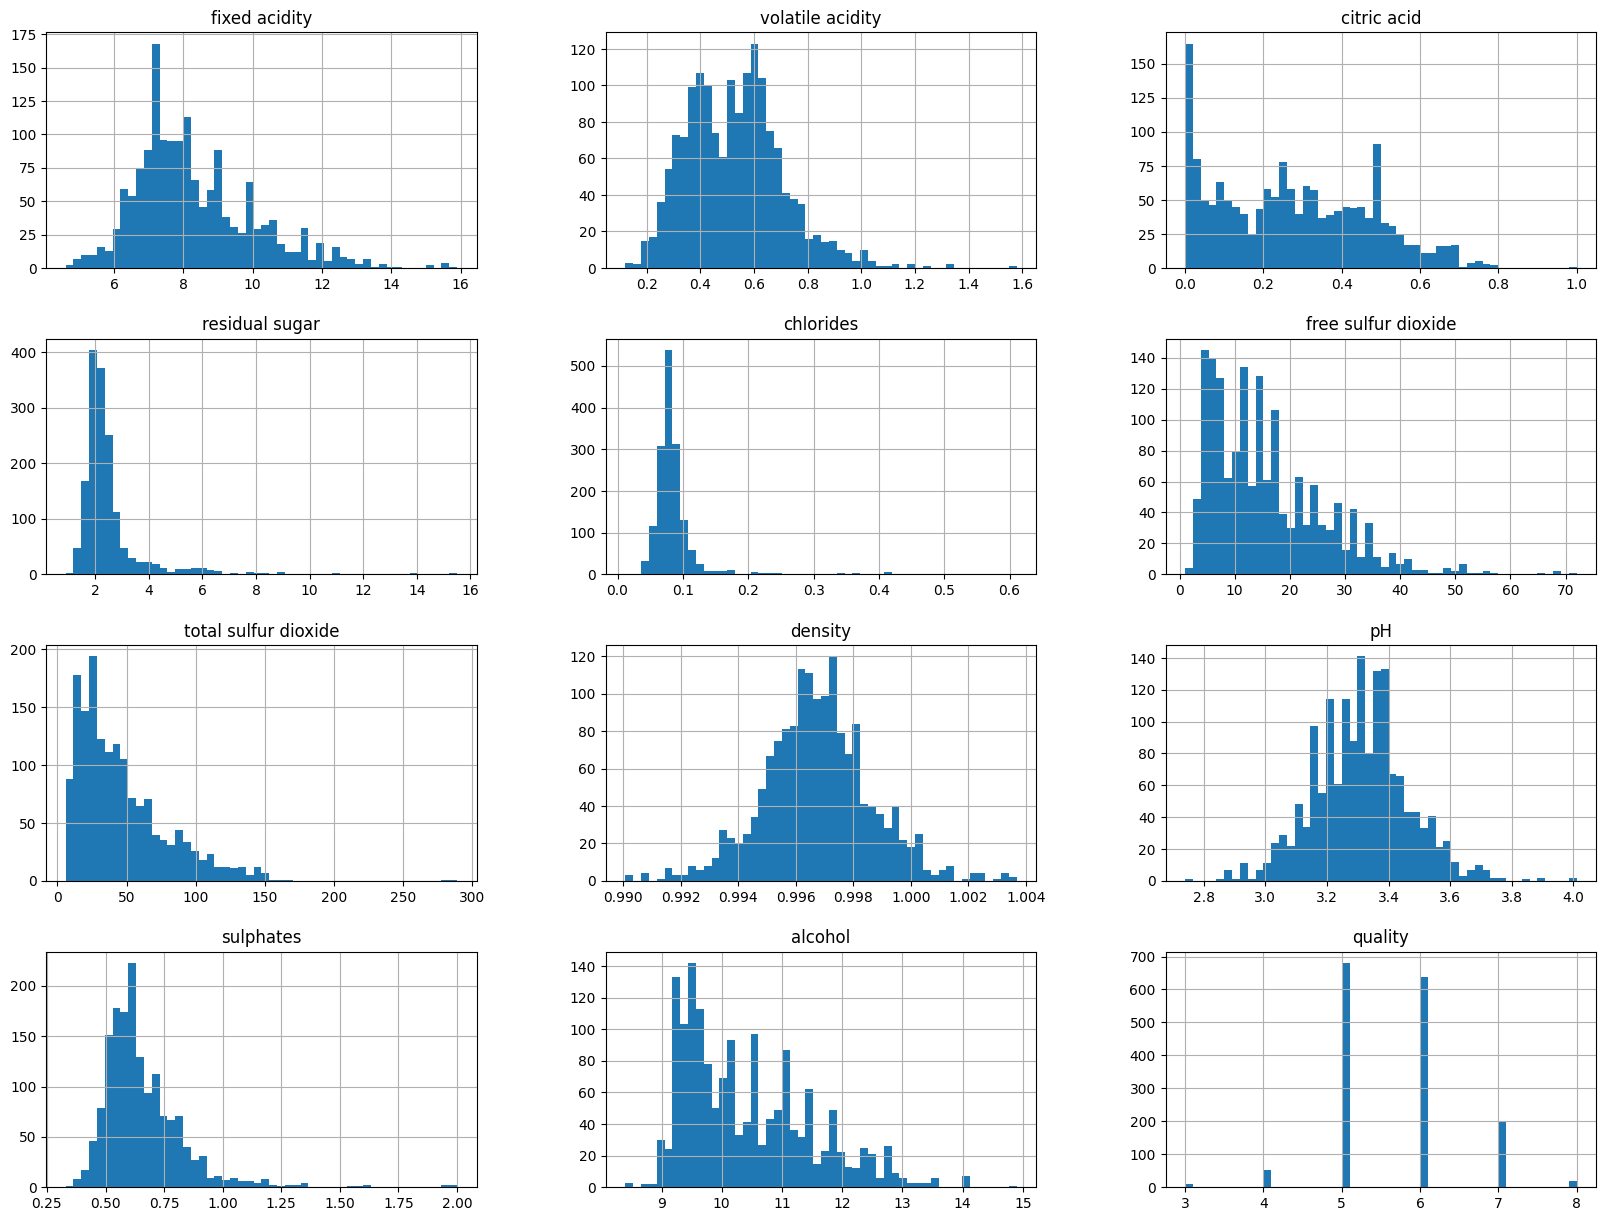

In [5]:
df.hist(bins= 50, figsize=(20,15))
plt.show()

C:\Users\roshi\AppData\Local\Temp\ipykernel_10824\640857443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=i, data=df, palette="Set1")


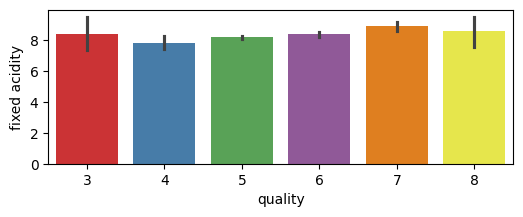

C:\Users\roshi\AppData\Local\Temp\ipykernel_10824\640857443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=i, data=df, palette="Set1")


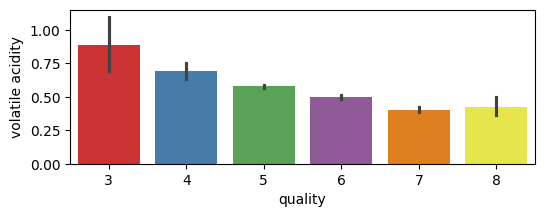

C:\Users\roshi\AppData\Local\Temp\ipykernel_10824\640857443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=i, data=df, palette="Set1")


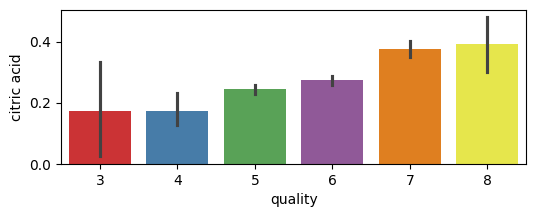

C:\Users\roshi\AppData\Local\Temp\ipykernel_10824\640857443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=i, data=df, palette="Set1")


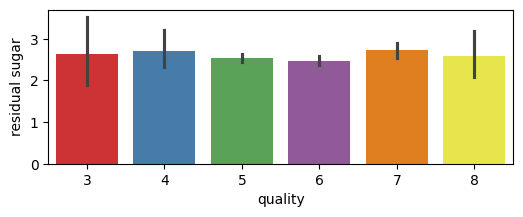

C:\Users\roshi\AppData\Local\Temp\ipykernel_10824\640857443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=i, data=df, palette="Set1")


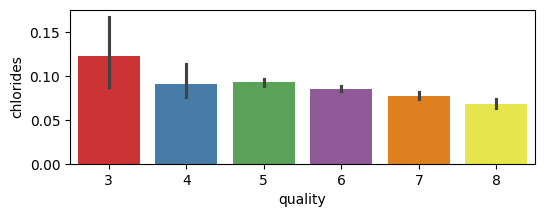

C:\Users\roshi\AppData\Local\Temp\ipykernel_10824\640857443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=i, data=df, palette="Set1")


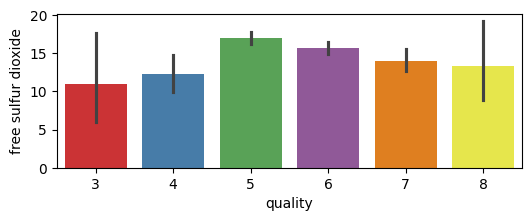

C:\Users\roshi\AppData\Local\Temp\ipykernel_10824\640857443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=i, data=df, palette="Set1")


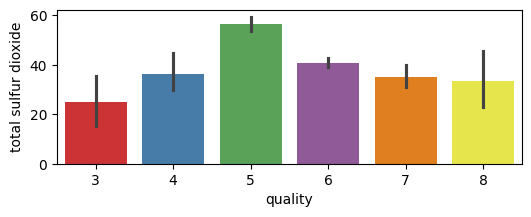

C:\Users\roshi\AppData\Local\Temp\ipykernel_10824\640857443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=i, data=df, palette="Set1")


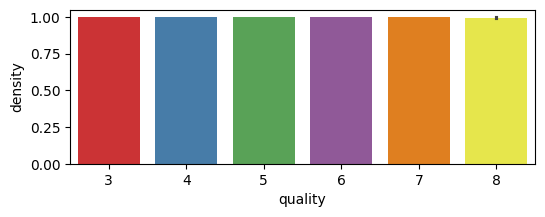

C:\Users\roshi\AppData\Local\Temp\ipykernel_10824\640857443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=i, data=df, palette="Set1")


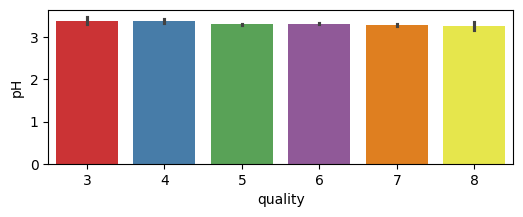

C:\Users\roshi\AppData\Local\Temp\ipykernel_10824\640857443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=i, data=df, palette="Set1")


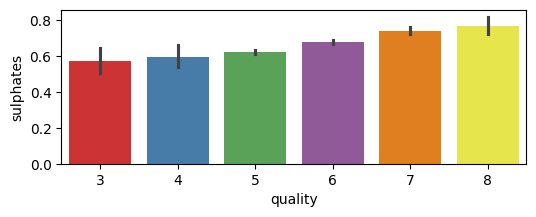

C:\Users\roshi\AppData\Local\Temp\ipykernel_10824\640857443.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quality', y=i, data=df, palette="Set1")


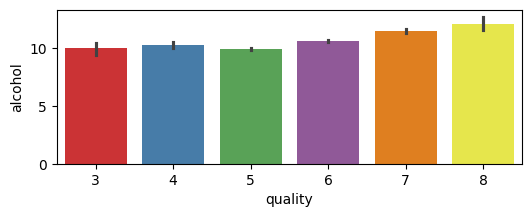

<Figure size 600x200 with 0 Axes>

In [6]:

for i in df.columns:
    plt.figure(figsize=(6,2))
    if(i!='quality'):    
        sns.barplot(x='quality', y=i, data=df, palette="Set1")
        plt.show()

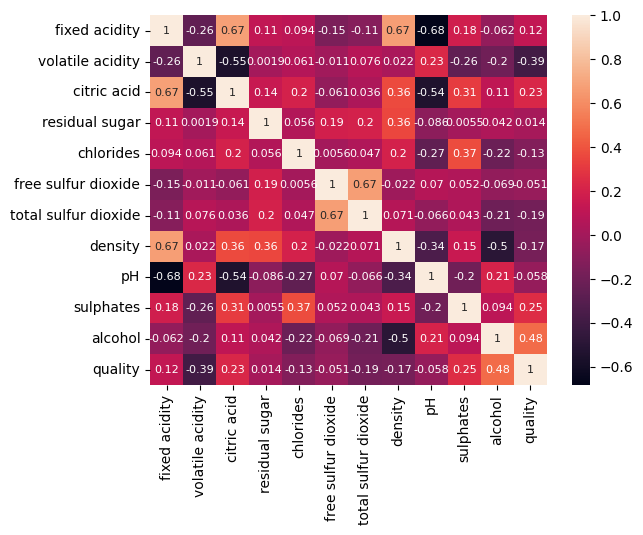

In [7]:
corr = df.corr()

sns.heatmap(corr, annot=True, fmt= ".2g", annot_kws={"fontsize": 8})
plt.show()

In [8]:
# df['fixed acidity'] = np.sqrt(df['fixed acidity'])
# df['volatile acidity'] = np.sqrt(df['volatile acidity'])
# df['free sulfur dioxide'] = np.sqrt(df['free sulfur dioxide'])
# df['total sulfur dioxide'] = np.sqrt(df['total sulfur dioxide'])
# df['alcohol'] = np.sqrt(df['alcohol'])

In [9]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [10]:
# categorizing the target column
df['quality']=np.where(df['quality']<=5,'good','bad')

df['quality'].unique()

array(['good', 'bad'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['quality']=le.fit_transform(df['quality'])

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(columns="quality")
y = df['quality']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [16]:
print("X_train shape ", X_train.shape)
print("X_test shape ", X_test.shape)
print("y_train shape ", y_train.shape)
print("y_test shape ", y_test.shape)

X_train shape  (1279, 11)
X_test shape  (320, 11)
y_train shape  (1279,)
y_test shape  (320,)


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

In [18]:
from sklearn.linear_model import ElasticNet
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score


In [19]:
def eval(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    acc = accuracy_score(actual, pred)

    return rmse, mae, r2, acc

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [34]:

from sklearn.ensemble import RandomForestClassifier


models = {
    "Logistics Regression": LogisticRegression(max_iter=1000, penalty="elasticnet"),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Classifier": RandomForestClassifier(max_depth=3),
    "AdaBoost Regressor": AdaBoostClassifier(),
    "KNN Classifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RidgeClassifier": RidgeClassifier(),
    "GaussianNB": GaussianNB()
}
model_list = []
r2_list =[]
accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae,model_train_rmse,model_train_r2,model_train_acc = eval(y_train, y_train_pred)

    model_test_mae,model_test_rmse,model_test_r2,model_test_acc = eval(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print("- accuracy score: {:.4f}".format(model_train_acc))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print("- accuracy score: {:.4f}".format(model_test_acc))
    r2_list.append(model_test_r2)
    accuracy_list.append(model_test_acc)
    
    print('='*35)
    print('\n')

Logistics Regression
Model performance for Training set
- Root Mean Squared Error: 0.2510
- Mean Absolute Error: 0.5010
- R2 Score: -0.0072
- accuracy score: 0.7490
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2594
- Mean Absolute Error: 0.5093
- R2 Score: -0.0523
- accuracy score: 0.7406


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
- accuracy score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2906
- Mean Absolute Error: 0.5391
- R2 Score: -0.1791
- accuracy score: 0.7094


Random Forest Classifier
Model performance for Training set
- Root Mean Squared Error: 0.2181
- Mean Absolute Error: 0.4671
- R2 Score: 0.1246
- accuracy score: 0.7819
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2844
- Mean Absolute Error: 0.5333
- R2 Score: -0.1538
- accu

c:\Users\roshi\OneDrive\Desktop\Git-1\Wine_Quality_ML\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 0.1986
- Mean Absolute Error: 0.4456
- R2 Score: 0.2030
- accuracy score: 0.8014
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2562
- Mean Absolute Error: 0.5062
- R2 Score: -0.0397
- accuracy score: 0.7438


KNN Classifier
Model performance for Training set
- Root Mean Squared Error: 0.2260
- Mean Absolute Error: 0.4754
- R2 Score: 0.0932
- accuracy score: 0.7740
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3875
- Mean Absolute Error: 0.6225
- R2 Score: -0.5722
- accuracy score: 0.6125


DecisionTreeClassifier
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
- accuracy score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2750
- Mean Absolute Error: 0.5244
- R2 Score: -0.1157
- accuracy

In [36]:
pd.DataFrame(list(zip(model_list, accuracy_list)), 
             columns=['Model Name', 'Accuracy_Score']).sort_values(by=["Accuracy_Score"],
             ascending=False)

,Model Name,Accuracy_Score
6,RidgeClassifier,0.746875
3,AdaBoost Regressor,0.743750
0,Logistics Regression,0.740625
7,GaussianNB,0.734375
5,DecisionTreeClassifier,0.725000
2,Random Forest Classifier,0.715625
1,Decision Tree,0.709375
4,KNN Classifier,0.612500
